<a href="https://colab.research.google.com/github/bobyuwono/-bobyuwono-.github.io/blob/master/DOJO_CPU_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2.8.0


In [ ]:
# Download Dataset
!wget --no-check-certificate \
   https://storage.googleapis.com/dojo-vault-123/cpu-full-a.csv \
    -O /tmp/cpu.csv

--2022-03-22 07:00:25--  https://storage.googleapis.com/dojo-vault-123/cpu-full-a.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.33.208, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.33.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12017 (12K) [text/csv]
Saving to: ‘/tmp/cpu.csv’

/tmp/cpu.csv        100%[===================>]  11.74K  --.-KB/s    in 0s      

2022-03-22 07:00:25 (103 MB/s) - ‘/tmp/cpu.csv’ saved [12017/12017]



In [ ]:
# Fungsi pembantu untuk plotting
def plot_series(time, series, format="-", start=0, end=None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("value")
  plt.grid(True)

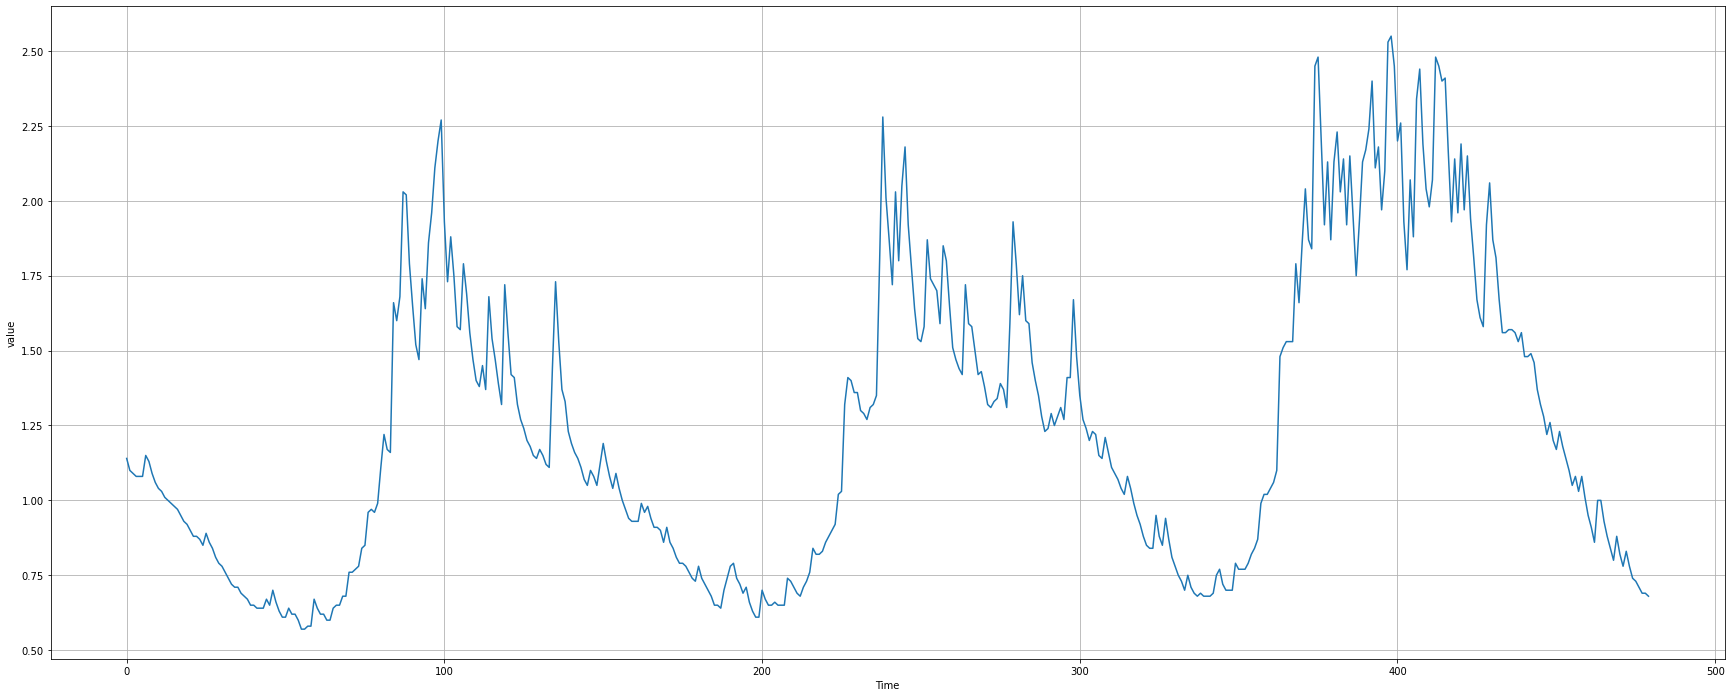

In [ ]:
# persiapkan array kosong untuk menampung data
time_step = []
cpu_usage = []

# buka dataset yang berformat .csv dan ekstrak datanya
import csv

with open('/tmp/cpu.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  time_indicator=0
  for row in reader:
    cpu_usage.append(float(row[1]))
    # time = row[0].split()[1]
    time_step.append(time_indicator)
    time_indicator +=1

# ubah array 'cpu_usage' menjadi sebuah np.array bernama 'series', dan 
# ubah 'time_step' menjadi np.array bernama 'time' 
import numpy as np
series = np.array(cpu_usage)
time = np.array(time_step)

# plot datanya untuk mempermudah visualisasi
plt.figure(figsize=(30,12))
plot_series(time,series)

In [ ]:
for i in range(10):
  print(time_step[i],cpu_usage[i])

0 1.14
1 1.1
2 1.09
3 1.08
4 1.08
5 1.08
6 1.15
7 1.13
8 1.09
9 1.06


Tl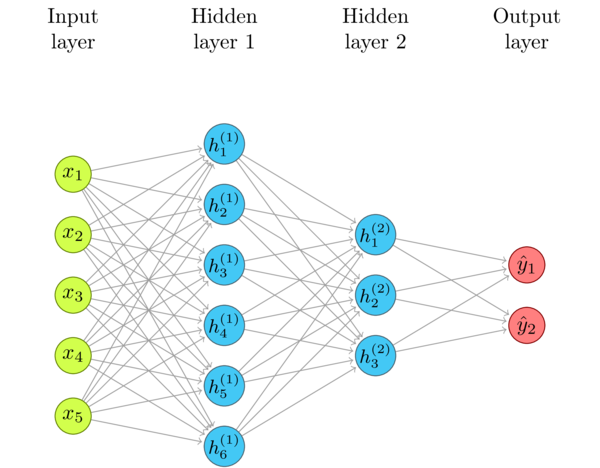

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM



# reshape to [10, 1]
n_features = 1
series = series.reshape((len(series), n_features))

# define generator
n_input = 10
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=8)

# bersihkan log training
tf.keras.backend.clear_session()

# define model
model = Sequential([
  tf.keras.layers.LSTM(64, activation='relu', input_shape=(n_input, n_features), return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(1),
])

# model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(generator, steps_per_epoch=1, epochs=500, verbose=0)

# make a one step prediction out of sample
x_input = series[-10:].reshape((1, n_input, n_features))

yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.8399792]]


In [ ]:
x_input = series[-10:].reshape((1, n_input, n_features))

yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.8399792]]


In [ ]:
series_duplicate = series

In [ ]:
type(series_duplicate)

numpy.ndarray

In [ ]:
def forecast_future( series,model, forecast_length, n_input, n_features):
  """
  1. looping i dari 1-forecast_length:
   - predict value series[-n_input:]
   - append
   - predict lagi
  """ 
  for i in range(0, forecast_length):
    x_input = series[-n_input:].reshape((1, n_input, n_features))
    y_out = model.predict(x_input, verbose=0)
    print('hasil predict ke {} adalah {}'.format(i, y_out))
    series = np.append(series,y_out)
  return series
 

In [ ]:
def model_forecast(model, series, window_size):
  ds = tf.data.Dataset.from_tensor_slices(series) 
  ds = ds.window(window_size, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size))
  ds = ds.batch(32).prefetch(1)
  forecast = model.predict(ds)
  return forecast

In [ ]:
# window_size = 10
# split_time = 300

# rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
# rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

# Forecasting

In [ ]:
forecast_length = 100 #seberapa panjang value yang ingin di-forecast? 
n_input = 10 #lebar window
n_features =  1 #lebar label

result = forecast_future(series, model, forecast_length, n_input, n_features)

hasil predict ke 0 adalah [[0.8399792]]
hasil predict ke 1 adalah [[0.8373095]]
hasil predict ke 2 adalah [[0.84314]]
hasil predict ke 3 adalah [[0.85051626]]
hasil predict ke 4 adalah [[0.86360645]]
hasil predict ke 5 adalah [[0.88059443]]
hasil predict ke 6 adalah [[0.8991917]]
hasil predict ke 7 adalah [[0.9197271]]
hasil predict ke 8 adalah [[0.94205844]]
hasil predict ke 9 adalah [[0.965132]]
hasil predict ke 10 adalah [[0.9894274]]
hasil predict ke 11 adalah [[1.0060948]]
hasil predict ke 12 adalah [[1.0247093]]
hasil predict ke 13 adalah [[1.0444521]]
hasil predict ke 14 adalah [[1.0650666]]
hasil predict ke 15 adalah [[1.0861607]]
hasil predict ke 16 adalah [[1.1075183]]
hasil predict ke 17 adalah [[1.129085]]
hasil predict ke 18 adalah [[1.1507963]]
hasil predict ke 19 adalah [[1.172593]]
hasil predict ke 20 adalah [[1.1944712]]
hasil predict ke 21 adalah [[1.2164087]]
hasil predict ke 22 adalah [[1.2388438]]
hasil predict ke 23 adalah [[1.2616528]]
hasil predict ke 24 adalah 

In [ ]:
#check apakah berhasil forecast?
# input yang diharapkan adalah:
# dimensi[0] = series.length + forecast.length
# dalam percobaan ini, dimensi[0] = 480+20 

result.shape

(580,)

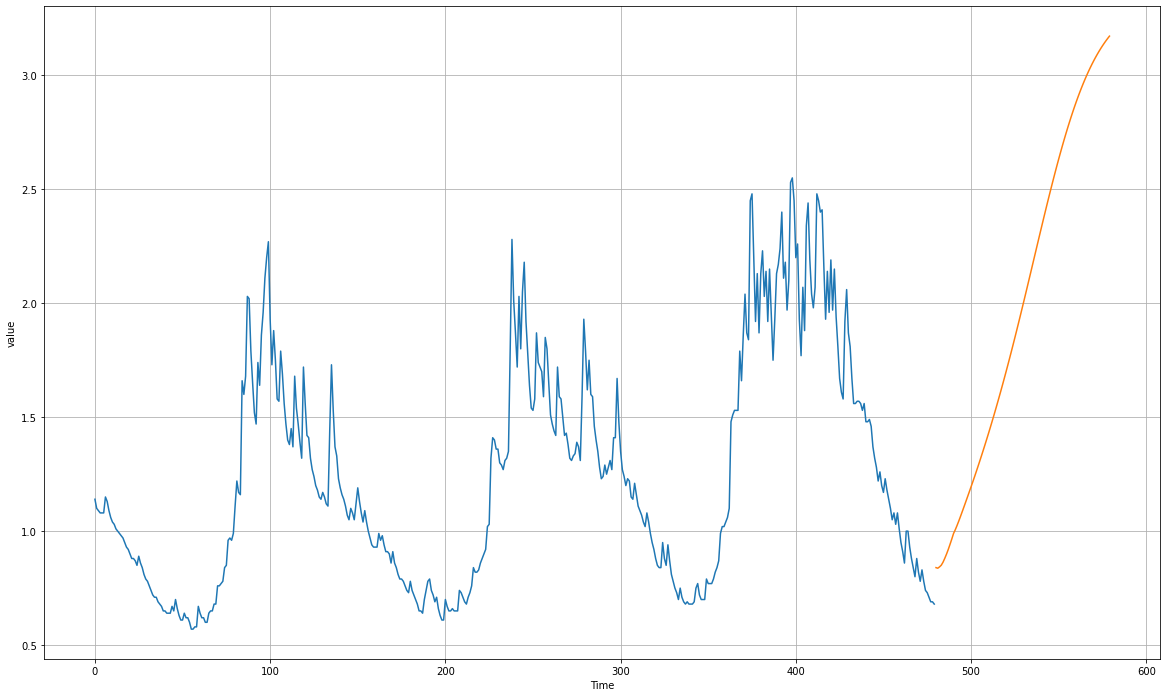

In [ ]:


expanded_time = np.arange(480 + forecast_length)


plt.figure(figsize=(20, 12))
plot_series(time, series)
plot_series(expanded_time[-100:], result[-100:])